In [3]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

#Establecemos ajustes en los parametros (cantidad max de columnas y filas) para poder visualizar correctamente las tablas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Introducción - Abstract

En el presente trabajo, se analizarán datos de pokémons utilizando gráficos Matplotlib y Seaborn. También se utilizo Pandas para la manipulación de dichos datos. En la base de datos se encuentra información respecto a pokémons, desde su nombre, altura, peso y tipo; hasta su nivel de ataque, de defensa, velocidad, entre otros.


**Definición de objetivo:** El universo pokémon se ha ido ampliando consecutivamente. La introducción de nuevos mapas en los videojuegos exigió la incorporación de nuevas especies pokémon. 

En este trabajo se pretende determinar a partir de los datos, patrones generales y medidas "tipicas" dentro del universo pokémon. Ya que en cada generación se introducen nuevas especies al universo pokémon, un conocimiento mas a fondo de dicho universo permitiría diseñar nuevos pokémons que no resulten incoherentes con el universo ya desarrollado.

Este trabajo responde al pedido de visualizaciones y parámetros numericos que den pautas basicas de como debería ser la nueva generación para evitar que las nuevas especies contrasten de forma irreal con las generaciones anteriores, rompiendo la suspension de incredulidad por parte del auditorio. 

Se parte de un archivo CSV (almacenado en la carpeta 'csv') que contiene detalles sobre cada pokémon, como nombre, tipo (principal y secundario, en caso de tenerlo), peso, altura, generación en que fue introducido, entre otros.

Se propone dar respuesta a las preguntas expuestas en el siguiente apartado, a partir del tratamiento de los datos proporcionados. Este analisis, asi como las respuestas a dichas preguntas, se acompañaran con visualizaciones y serán respaldadas por valores numericos con sus correspondientes interpretaciones. Se realizarán las siguientes tareas con los datos:

1- Leer, transformar y preparar datos para su visualización
2- Realizar análisis y construir visualizaciones de los datos para identificar patrones en el conjunto de datos.
3- Intentar dar una respuesta fundamentada (si es posible) a las siguientes cuestiones (o grupos de preguntas):

* ¿Cuantos pokémons fueron introducidos por generación?¿Cuantos pokémons nuevos podrían ser introducidos de forma coherente? 
* ¿Existe algun tipo/combinacion de tipos en el cual resulte conveniente/necesario enfocarse?¿Por que motivo?
* ¿Respecto del peso y la altura, hay alguna tendencia general?¿Podemos establecer un limite que nos permita diferenciar entre "tipicos" y "atipicos"?¿Cual es su distribución numérica?¿Guarda alguna relación con si son "legendarios" o no?
* ¿Cuantos pokémon legendarios suelen ser introducidos por generación?

# Exploracion de los datos

Comenzamos cargando el dataset

In [4]:
#Cargamos el dataset
dataset = pd.read_csv('csv/pokemon.csv')

#Cambiamos el orden de algunas columnas para mayor legibilidad, llevandolas al comienzo
first_column = dataset.pop('name') 
dataset.insert(0, 'name', first_column)

second_column = dataset.pop('type1') 
dataset.insert(1, 'type1', second_column)

third_column = dataset.pop('type2') 
dataset.insert(2, 'type2', third_column)

fourth_column = dataset.pop('height_m') 
dataset.insert(3, 'height_m', fourth_column)

fifth_column = dataset.pop('weight_kg') 
dataset.insert(4, 'weight_kg', fifth_column)

sixth_column = dataset.pop('generation') 
dataset.insert(5, 'generation', sixth_column)

seventh_column = dataset.pop('is_legendary') 
dataset.insert(6, 'is_legendary', seventh_column)

valor1 = dataset.pop('attack') 
dataset.insert(8, 'attack', valor1)

valor2 = dataset.pop('defense') 
dataset.insert(9, 'defense', valor2)

valor3 = dataset.pop('hp') 
dataset.insert(10, 'hp', valor3)

valor4 = dataset.pop('speed') 
dataset.insert(11, 'speed', valor4)

valor5 = dataset.pop('sp_attack') 
dataset.insert(12, 'sp_attack', valor5)

valor6 = dataset.pop('sp_defense') 
dataset.insert(13, 'sp_defense', valor6)

rate1 = dataset.pop('capture_rate') 
dataset.insert(14, 'capture_rate', rate1)

rate2 = dataset.pop('experience_growth') 
dataset.insert(15, 'experience_growth', rate2)

rate3 = dataset.pop('percentage_male') 
dataset.insert(16, 'percentage_male', rate3)

rate4 = dataset.pop('classfication') 
dataset.insert(17, 'classfication', rate4)


#Establecemos la columna "pokedex_number" como indice
dataset.set_index('pokedex_number', inplace = True)

Realizamos una primera lectura rapida

In [5]:
#Cargamos las primeras entradas
dataset.head()

,name,type1,type2,height_m,weight_kg,generation,is_legendary,abilities,attack,defense,hp,speed,sp_attack,sp_defense,capture_rate,experience_growth,percentage_male,classfication,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,base_egg_steps,base_happiness,base_total,japanese_name
pokedex_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Bulbasaur,grass,poison,0.7,6.9,1,0,"['Overgrow', 'Chlorophyll']",49,49,45,45,65,65,45,1059860,88.1,Seed Pokémon,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,5120,70,318,Fushigidaneフシギダネ
2,Ivysaur,grass,poison,1.0,13.0,1,0,"['Overgrow', 'Chlorophyll']",62,63,60,60,80,80,45,1059860,88.1,Seed Pokémon,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,5120,70,405,Fushigisouフシギソウ
3,Venusaur,grass,poison,2.0,100.0,1,0,"['Overgrow', 'Chlorophyll']",100,123,80,80,122,120,45,1059860,88.1,Seed Pokémon,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,5120,70,625,Fushigibanaフシギバナ
4,Charmander,fire,NaN,0.6,8.5,1,0,"['Blaze', 'Solar Power']",52,43,39,65,60,50,45,1059860,88.1,Lizard Pokémon,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,5120,70,309,Hitokageヒトカゲ
5,Charmeleon,fire,NaN,1.1,19.0,1,0,"['Blaze', 'Solar Power']",64,58,58,80,80,65,45,1059860,88.1,Flame Pokémon,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,5120,70,405,Lizardoリザード


In [1]:
#Procedemos a eliminar columnas innecesarias. Las siguientes tres lineas de codigo 
#se comentaron para evitar ejecutarlas por error, puesto que las columnas eliminadas
#no existen, por ende no pueden vovler a ser eliminadas.

# dataset.pop('base_total')
# dataset.pop('base_happiness')
# dataset.pop('base_egg_steps')

Revisamos que columnas tienen valores nulos, para identificar si es una anomalia o si responden a un motivo legitimo

In [6]:
dataset.isnull().sum()

name                   0
type1                  0
type2                384
height_m              20
weight_kg             20
generation             0
is_legendary           0
abilities              0
attack                 0
defense                0
hp                     0
speed                  0
sp_attack              0
sp_defense             0
capture_rate           0
experience_growth      0
percentage_male       98
classfication          0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
base_egg_steps         0
base_happiness         0
base_total             0
japanese_name          0


#### Tipo 2

Observamos que 384 pokemons no poseen informacion en la columna "type 2". Dado que no es necesario que un pokemon tenga un tipo secundario, podemos asumir que la informacion es correcta.

Respecto a los valores nulos, en las columnas "height_m" y "weight_kg", deberiamos revisar si dichas entradas se corresponden con pokemones que efectivamente carecen de dicha informacion (por ser, por ejemplo, de tipo fantasma)

#### Genero y Genero especial 

Hay casos especiales, como Nidorina o Tsareena, las cuales pertenecen a una especie cuyos individuos todos son hembras. Tambien existen especies pokemon cuyos individuos son en su totalidad machos, mientras que otros, como Magnemite, directamente carecen de genero.

Entendemos que esto explica la cantidad de entradas vacias en la columna "percentage_male". Sin embargo, se evidencia tambien una carencia del dataset, pues mientras que los pokemon de genero especial macho estan identificados, siendo aquellos cuyo valor en la columna mencionada es de 100, no hay forma de discriminar entre especies pokemon cuyos individuos son solo hembras de aquellas en las cuales sus individuos carecen de genero.

## Manipulacion de datos

**Genero:** Para una mejor manipulación, reemplazamos los valores nulos de la columna "percentage_male" por la cadena de texto "fem/nongen special". Reemplazaremos también el valor "100" por la cadena "male special", para asi evitar resultados sesgados en el analisis estadistico.

In [7]:
dataset.percentage_male.fillna('fem/nongen special', inplace=True)
dataset.percentage_male.replace(100,'male special', inplace=True)
dataset.type2.fillna('non', inplace=True)

**Tipo secundario:** Se observo que algunos pokémon figuran con el mismo tipo primario y secundario, esto no puede ocurrir. Se procedio a corroborar uno por uno si esto se debia a que estos pokémon tienen algún otro tipo secundario que no se cargo correctamente.
Al haber corroborado que estos pokémon no tienen un tipo secundario, se procedio a eliminar el valor de la columna "type2" para todos estos pokémon. Esta tarea se automatizo mediante el siguiente codigo:

In [8]:
auxvar = dataset[dataset.type2 == dataset.type1].index.values.tolist()

for i in auxvar:
    dataset.type2[i] = np.nan

C:\Users\José\AppData\Local\Temp\ipykernel_3836\1189651012.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.type2[i] = np.nan


## Estadisticas generales

Por ultimo, en la siguiente tabla se ofrecen las estadiscas descriptivas de cada columna (valor minimo, maximo, promedio, cuartiles y conteo de filas)

In [9]:
dataset.describe()

,height_m,weight_kg,generation,is_legendary,attack,defense,hp,speed,sp_attack,sp_defense,experience_growth,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,base_egg_steps,base_happiness,base_total
count,781.000000,781.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,8.010000e+02,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,1.163892,61.378105,3.690387,0.087391,77.857678,73.008739,68.958801,66.334582,71.305868,70.911361,1.054996e+06,0.996255,1.057116,0.968789,1.073970,1.068976,1.065543,1.135456,1.192884,0.985019,1.034020,1.098002,1.208177,0.887016,0.975343,1.005306,1.250312,0.983458,1.058365,7191.011236,65.362047,428.377029
std,1.080326,109.354766,1.930420,0.282583,32.158820,30.769159,26.576015,28.907662,32.353826,27.942501,1.602558e+05,0.597248,0.438142,0.353058,0.654962,0.522167,0.717251,0.691853,0.604488,0.558256,0.788896,0.738818,0.735356,0.266106,0.549375,0.495183,0.697148,0.500117,0.606562,6558.220422,19.598948,119.203577
min,0.100000,0.100000,1.000000,0.000000,5.000000,5.000000,1.000000,5.000000,10.000000,20.000000,6.000000e+05,0.250000,0.250000,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.250000,0.000000,0.250000,0.000000,0.000000,0.000000,0.250000,0.250000,0.250000,1280.000000,0.000000,180.000000
25%,0.600000,9.000000,2.000000,0.000000,55.000000,50.000000,50.000000,45.000000,45.000000,50.000000,1.000000e+06,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,1.000000,0.500000,1.000000,1.000000,0.500000,0.500000,5120.000000,70.000000,320.000000
50%,1.000000,27.300000,4.000000,0.000000,75.000000,70.000000,65.000000,65.000000,65.000000,66.000000,1.000000e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5120.000000,70.000000,435.000000
75%,1.500000,64.800000,5.000000,0.000000,100.000000,90.000000,80.000000,85.000000,91.000000,90.000000,1.059860e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,6400.000000,70.000000,505.000000
max,14.500000,999.900000,7.000000,1.000000,185.000000,230.000000,255.000000,180.000000,194.000000,230.000000,1.640000e+06,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000,30720.000000,140.000000,780.000000


**Distribución por genero**

En el siguiente grafico exponemos la distribución de genero en los pokémon normales

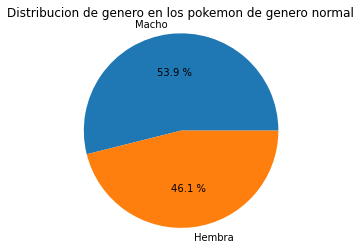

In [10]:
#Piechart
listagenero = []
for i in dataset.percentage_male:
    if type(i) == float:
        listagenero.append(i)
        
seriegenero = pd.Series(listagenero)

estdesc = seriegenero.describe()
promediom = estdesc.loc['mean']
promediof = 100 - promediom
data = [promediom,promediof]
plt.title('Distribucion de genero en los pokemon de genero normal')
plt.pie(data, labels =["Macho", "Hembra"], autopct="%0.1f %%")
plt.axis("equal")
plt.show()

Podemos observar en el grafico de torta, una proporción bastante equilibrada en el sexo de los pokémon.
Cabe mencionar que dicha proporción resulta del calculo hecho sobre la columna "percentage_male" el cual refleja la probabilidad de que un pokémon sea de sexo masculino al generarse en el videojuego, y no una estadistica de la población real.

Dado que esta distribución responde solo a los pokémons de genero normal, procedemos a complementar la información con el calculo de los pokémons de genero especial:

In [11]:
listaspec = []
for i in dataset.percentage_male:
    if type(i) == str:
        listaspec.append(i)
        
seriespec = pd.Series(listaspec)
speccount = seriespec.value_counts()

print('Hay', speccount[0], 'pokemons de genero especial hembra o sin genero')
print('Hay', speccount[1], 'pokemons de genero especial macho')

Hay 98 pokemons de genero especial hembra o sin genero
Hay 19 pokemons de genero especial macho


# Respondiendo los interrogantes

## Primera cuestión:

En el juego, la generación hace referencia a las nuevas regiones del mundo que se fueron agregando con el lanzamiento de las nuevas ediciones. En cada nueva generación, se introdujeron nuevos pokémons, los cuales habitan las nuevas regiones.
**¿Cuantos pokémons fueron introducidos por generación?**

In [12]:
pokemonporgen = dataset.groupby('generation').generation.count()

for i in range(7):
    print('Cantidad de pokémon introducidos en la generación', i+1, ':', pokemonporgen[i+1])

maxpoke= 0
maxgen = 0
for i in range(7):
    if pokemonporgen[i+1] >= maxpoke:
        maxpoke = pokemonporgen[i+1]
        maxgen = i+1
print('Cantidad maxima de pokémon introducidos por generación:', maxpoke, 'pokémon introducidos en la generación', maxgen)     
        
minpoke= 801
mingen = 801
for i in range(7):
    if pokemonporgen[i+1] <= minpoke:
        minpoke = pokemonporgen[i+1]
        mingen = i+1
print('Cantidad mínima de pokémon introducidos por generación:', minpoke, 'pokémon introducidos en la generación', mingen)  
    
ppg = 0    
for i in range(7):
    ppg = ppg +  pokemonporgen[i+1]
    
print('Cantidad promedio de pokémon introducidos por generación:', ppg//7)

Cantidad de pokémon introducidos en la generación 1 : 151
Cantidad de pokémon introducidos en la generación 2 : 100
Cantidad de pokémon introducidos en la generación 3 : 135
Cantidad de pokémon introducidos en la generación 4 : 107
Cantidad de pokémon introducidos en la generación 5 : 156
Cantidad de pokémon introducidos en la generación 6 : 72
Cantidad de pokémon introducidos en la generación 7 : 80
Cantidad maxima de pokémon introducidos por generación: 156 pokémon introducidos en la generación 5
Cantidad mínima de pokémon introducidos por generación: 72 pokémon introducidos en la generación 6
Cantidad promedio de pokémon introducidos por generación: 114


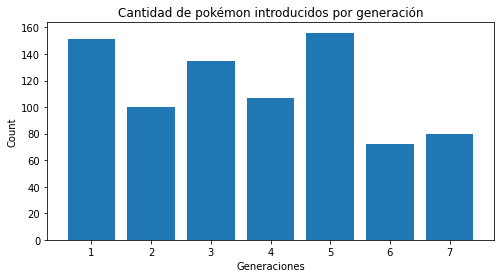

In [13]:
#barchart
fig, ax = plt.subplots(figsize=(8,4))
ax.bar(pokemonporgen.index, pokemonporgen)
ax.set_title("Cantidad de pokémon introducidos por generación")
ax.set_ylabel("Count")
ax.set_xlabel("Generaciones")
plt.show()

La cantidad de pokémon introducidos por generación oscila entre 72 y 151. Los valores maximos y minimos no se alejan demasiado del promedio.

Respecto de la pregunta **¿Cuantos pokémon nuevos podrían ser introducidos de forma coherente?**, la respuesta dependerá del objetivo detras de la nueva generación:

Si la nueva región debe guardar semejanza con las anteriores, entonces la cantidad de pokémon deberá acercarse a 114(±30)
Si, en cambio, se pretende lograr el efecto opuesto (como podría ser el agregar una región sumamente extensa, o bien una pequeña actualización en la cual se incorpora una pequeña isla con pocos ejemplares nuevos) entonces se deberán considerar mas de 151, o menos de 72.

## Segunda cuestión:

En el mundo pokémon los mismos son catalogados según su tipo. En algunos casos, además, cuando evolucionan pueden conseguir un segundo tipo o tipo secundario. Procederemos a analizar la distribución de estos tipos para dar respuesta al siguiente interrogante:

**¿Existe algun tipo/combinacion de tipos en el cual resulte conveniente/necesario enfocarse?¿Por que motivo?**

A continuación analizaremos la distribución de los pokémons según su tipo principal:

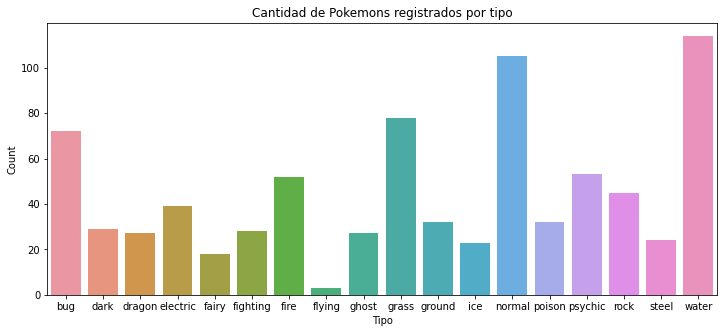

In [14]:
plt.figure(figsize=(12,5))

type1valores= dataset.groupby('type1').type1.count()

plt.title("Cantidad de Pokemons registrados por tipo")

g = sns.barplot(x=type1valores.index, y=type1valores, )
g.set_xlabel('Tipo')
g.set_ylabel('Count')
plt.show()

Notamos una importante brecha entre los tipo "normal", "agua", "insecto" y "hierba", con alrededor de 100 especies pokémon para cada tipo; y los demas tipos, para los cuales casi ninguno llega a contar con 50 especies. Ofrecemos información mas detallada al respecto a continuación:

In [15]:
dataset.groupby('type1').type1.count()

type1
bug          72
dark         29
dragon       27
electric     39
fairy        18
fighting     28
fire         52
flying        3
ghost        27
grass        78
ground       32
ice          23
normal      105
poison       32
psychic      53
rock         45
steel        24
water       114
Name: type1, dtype: int64

### Tipo secundario

Para complementar la información sobre la distribución de los pokémons segun su tipo principal, se confecciono la siguiente tabla, en la cual se indica la cantidad de especies pokémons para cada tipo secundario que existen, distribuidos segun su tipo principal

In [19]:
tipos = ['bug','dark','dragon','electric','fairy','fighting','fire','flying',
         'ghost','grass','ground','ice','normal','poison','psychic','rock','steel','water','non']

dftipos = pd.DataFrame(index = tipos)

for i in tipos:
    x = []
    a = dataset.loc[dataset.type2 == i]
    for j in tipos:
        b = a.loc[a.type1 == j]
        x.append(b.name.count())
    dftipos[i] = x


dftipos.rename_axis('Tipo_principal')

,bug,dark,dragon,electric,fairy,fighting,fire,flying,ghost,grass,ground,ice,normal,poison,psychic,rock,steel,water,non
Tipo_principal,,,,,,,,,,,,,,,,,,,
bug,0,0,0,4,2,3,2,13,1,6,1,0,0,11,0,3,5,3,18
dark,0,0,4,0,0,2,2,5,1,0,0,2,0,0,2,0,2,0,9
dragon,0,0,0,1,0,2,1,4,0,0,4,1,0,0,2,0,0,0,12
electric,0,0,0,0,2,0,0,3,1,0,0,0,2,0,0,0,4,0,26
fairy,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,16
fighting,0,1,0,0,0,0,0,1,0,0,0,1,0,0,2,0,1,0,22
fire,0,1,1,0,0,6,0,6,0,0,2,2,2,0,1,1,1,1,27
flying,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
ghost,0,1,1,0,1,0,3,2,0,5,2,0,0,3,0,0,0,0,9


A partir de dicha tabla se procedio a generar el siguiente Heatmap:

<AxesSubplot:title={'center':'Correlacion entre tipo principal y secundario de pokemons'}>

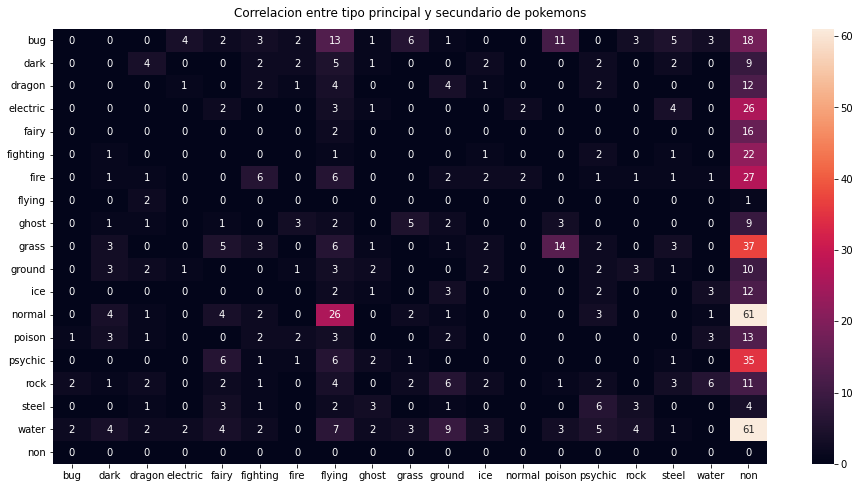

In [20]:
plt.figure(figsize=(16, 8))

asd = sns.heatmap(dftipos, annot=True)
asd.set_title('Correlacion entre tipo principal y secundario de pokemons', fontdict={'fontsize':12}, pad=12)
asd

Del mismo se pueden extraer ciertas conclusiones:

- Las combinaciones mas numerosas son aquellas con solo un tipo principal, con excepcion de:
    1. Tipo volador: 1 especie pokemon
    2. Tipo Oscuro y Fantasma: 9 especies pokemon en cada uno
    3. Tipo Acero: 4 especies pokemon
- De entre ellas destacan la tipo "normal" y "agua" (Lo cual se presumia muy probable, teniendo en cuenta el grafico de distribución de pokémons segun su tipo principal), siendo ademas las unicas con mas de 40 especies pokemon, y teniendo 24 mas que la tercera combinacion (tipo hierba)
- Fuera de la ultima columna, la mayoria de las combinaciones posibles casi no ocurren realmente (o cuentan con menos de 10 especies pokemon)
- Las siguientes combinaciones son una excepción a lo recien mencionado:
    1. Normal-volador: 26 especies pokemon
    2. Hierba-veneno: 14 especies pokemon
    3. Insecto-volador: 13 especies pokemon
    4. Insecto-veneno: 11 especies pokemon

Nuevamente, la respuesta a la pregunta dependerá del objetivo detras de la nueva generación:

Por un lado, si se pretende que la nueva región guarde semejanza con las anteriores, será conveniente adecuarse a las tendencias resaltadas.
Si se pretende, en cambio, introducir una región esencialmente diferente, por ejemplo, argumentando que es una región que permanecio completamente aislada del resto del mundo, seria conveniente utilizar combinaciones poco usuales o inexistentes.

## Tercera cuestión:


1- **¿Respecto del peso y la altura, hay alguna tendencia general?**

2- **Podemos establecer un limite que nos permita diferenciar entre "tipicos" y "atipicos"?**

3- **¿Cual es su distribución numérica?**

4- **¿Guarda alguna relación con si son "legendarios" o no?**

### Relación peso-altura

En el próximo grafico analizaremos la relación entre el peso y la altura de los pokémons, con el objetivo de determinar si estos valores guardan alguna coherencia entre si (si hay equilibrio) o bien si existe alguna tendencia general.

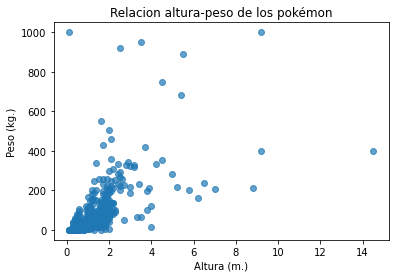

In [21]:
#scatterplot
fig, ax = plt.subplots()
alturas = dataset["height_m"]
pesos = dataset["weight_kg"]
ax.scatter(alturas, pesos, alpha=0.7)
ax.set_title("Relacion altura-peso de los pokémon")
ax.set_xlabel("Altura (m.)")
ax.set_ylabel("Peso (kg.)")
plt.show()

### 1- Tendencia general:

De la lectura del gráfico de dispersión de puede concluir que hay una tendencia general al equilibrio entre altura y peso, que además, se mantiene dentro de margenes que serian considerados relativamente normales para animales del mundo real (menos de 4 metros de altura, y menos de 500 kilos).

### 2- Pokémon tipicos / atipicos

Se observa, sin embargo, en el grafico anterior, algunos pokémon que exceden los margenes mencionados. Nos referiremos a aquellos que se encuadran dentro de la tendencia general como "tipicos", mientras que aquellos que exceden las medidas que serían consideradas "normales" en un animal del mundo real, seran llamados "atipicos". Procedemos a identificarlos en la siguiente tabla:

In [22]:
pokemonsatipicos1 = dataset.loc[dataset.height_m > 4]
pokemonsatipicos2 = dataset.loc[dataset.weight_kg > 500]

pokemonsatipicos = pd.concat([pokemonsatipicos1,pokemonsatipicos2])
pokemonsatipicos.drop_duplicates(inplace=True)
pokemonsatipicos.iloc[:][['name','height_m','weight_kg','is_legendary','generation']]

,name,height_m,weight_kg,is_legendary,generation
pokedex_number,,,,,
95,Onix,8.8,210.0,0,1
130,Gyarados,6.5,235.0,0,1
208,Steelix,9.2,400.0,0,2
249,Lugia,5.2,216.0,1,2
321,Wailord,14.5,398.0,0,3
350,Milotic,6.2,162.0,0,3
382,Kyogre,4.5,352.0,1,3
384,Rayquaza,7.0,206.5,1,3
483,Dialga,5.4,683.0,1,4


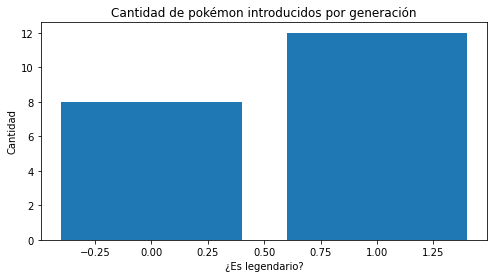

In [23]:
fig, ax = plt.subplots(figsize=(8,4))
isleg = pokemonsatipicos.groupby('is_legendary').generation.count()
ax.bar(isleg.index, isleg)
ax.set_title("Cantidad de pokémon introducidos por generación")
ax.set_ylabel("Cantidad")
ax.set_xlabel("¿Es legendario?")
plt.show()

#### Pokémons atipicos "equilibrados" y "desequilibrados"

La tabla anterior identifica los pokémons que exceden los margenes "normales" de peso y tamaño. A continuacion discriminaremos estos en dos categorias:

#### **Equilibrados**

Exceden ambos margenes, es decir, son en exceso pesados, pero también son gigantes:

In [24]:
pokemonsequilibrados = pokemonsatipicos1.loc[dataset.weight_kg > 500]

pokemonsequilibrados.iloc[:][['name','height_m','weight_kg','is_legendary']]

,name,height_m,weight_kg,is_legendary
pokedex_number,,,,
483,Dialga,5.4,683.0,1
487,Giratina,4.5,750.0,1
797,Celesteela,9.2,999.9,1
799,Guzzlord,5.5,888.0,1


Una particularidad que podemos notar en los pokémon atipicos equilibrados es que son todos legendarios.

#### **Desequilibrados:** 

Exceden solo un margen, es decir, son gigantes y no tan pesados como se esperaría, o bien pesan demasiado para su tamaño:

In [25]:
pokemonsdesequilibrados1 = pokemonsatipicos1.loc[dataset.weight_kg <= 500]
pokemonsdesequilibrados2 = pokemonsatipicos2.loc[dataset.height_m <= 4]
pokemonsdesequilibrados = pd.concat([pokemonsdesequilibrados1,pokemonsdesequilibrados2])

pokemonsdesequilibrados.iloc[:][['name','height_m','weight_kg', 'is_legendary']]

,name,height_m,weight_kg,is_legendary
pokedex_number,,,,
95,Onix,8.8,210.0,0
130,Gyarados,6.5,235.0,0
208,Steelix,9.2,400.0,0
249,Lugia,5.2,216.0,1
321,Wailord,14.5,398.0,0
350,Milotic,6.2,162.0,0
382,Kyogre,4.5,352.0,1
384,Rayquaza,7.0,206.5,1
484,Palkia,4.2,336.0,1


En el caso de los pokémon atipicos desequilibrados, vemos que hay tanto legendarios como no legendarios. Discriminamos a continuacion los 2 tipos de pokémon desequilibrados (gigantes y livianos de pequeños y pesados) para buscar algun patron.

##### Pokémon gigantes y livianos:

In [26]:
pokemonsdesequilibrados1.iloc[:][['name','height_m','weight_kg', 'is_legendary']]

,name,height_m,weight_kg,is_legendary
pokedex_number,,,,
95,Onix,8.8,210.0,0
130,Gyarados,6.5,235.0,0
208,Steelix,9.2,400.0,0
249,Lugia,5.2,216.0,1
321,Wailord,14.5,398.0,0
350,Milotic,6.2,162.0,0
382,Kyogre,4.5,352.0,1
384,Rayquaza,7.0,206.5,1
484,Palkia,4.2,336.0,1


Notamos que hay 5 pokémon no legendarios, y 6 que sí. Podemos concluir que no hay un patron observable.

##### Pokémon pequeños y pesados:

In [27]:
pokemonsdesequilibrados2.iloc[:][['name','height_m','weight_kg', 'is_legendary']]

,name,height_m,weight_kg,is_legendary
pokedex_number,,,,
376,Metagross,1.6,550.0,0
383,Groudon,3.5,950.0,1
713,Avalugg,2.0,505.0,0
750,Mudsdale,2.5,920.0,0
790,Cosmoem,0.1,999.9,1


Nuevamente notamos que no hay un patrón, ya que la cantidad de legendarios y no legendarios es casi la misma.

De los pokémon de la lista, el mas llamativo es "Cosmoem", el cual mide tan solo 10 centimetros, pero pesa una tonelada.
En una primera instancia se pensó que podría ser un error en el dataset, sin embargo una breve investigación en internet revelo que la información es correcta.

En https://pokemon.fandom.com/es/wiki/Cosmoem se afirma de el que **"Existen teorías que afirman que debido a su desconcertante peso podría estar formado de materia oscura."**


### 3- Distribucion numérica:

Sabemos que hay 801 especies pokémon. A continuación comparamos en terminos netos y porcentuales la cantidad de "tipicos" y "atipicos":

In [28]:
#Contamos la cantidad de pokémon atipicos
x = len(pokemonsatipicos.index)

print('Hay 801 pokémon, de ellos',
      801 - x, 'son considerados "tipicos" respecto su peso y altura, mientras que',
      x, 'son considerados "atipicos"\n \nEn terminos porcentuales:\n \n',
      ((801 - x)*100)/801, '% "tipicos"\n',
      x*100/801, '% "atipicos"\n')

#Contamos la cantidad de equilibrados y desequilibrados
y= len(pokemonsequilibrados.index)
z= len(pokemonsdesequilibrados.index)
print('De los pokémon atipicos', y, 'son "equilibrados", mientras que', z, 'son "desequilibrados"')

Hay 801 pokémon, de ellos 781 son considerados "tipicos" respecto su peso y altura, mientras que 20 son considerados "atipicos"
 
En terminos porcentuales:
 
 97.50312109862672 % "tipicos"
 2.4968789013732833 % "atipicos"

De los pokémon atipicos 4 son "equilibrados", mientras que 16 son "desequilibrados"


### 4- Legendarios:

Respecto de la pregunta sobre si hay alguna relación entre que sean atipicos y sean o no legendarios, como dijimos anteriormente, no parece haber alguna relación, excepto en el caso de los pokémon atipicos equilibrados, los cuales son todos legendarios. Sin embargo, dado que solo 4 pokémon entran en esta categoría, esto podría ser una mera coincidencia.

## Cuarta cuestión:

**¿Cuantos pokémon legendarios suelen ser introducidos por generación?**

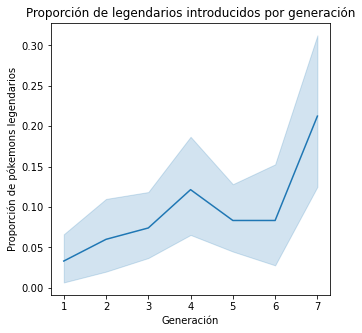

In [29]:
# sns.lineplot(x = dataset['generation'], y = dataset, hue=dataset["type1"])

plt.figure(figsize=(5,5))
f = sns.lineplot(x="generation", y="is_legendary", data=dataset)
plt.title("Proporción de legendarios introducidos por generación")
f.set_xlabel('Generación')
f.set_ylabel('Proporción de pókemons legendarios')
plt.show()


# #Se generó un dataframe (para mayor legibilidad) mostrando la cantidad neta de pokémons legendarios, y no legendarios.
# legendarios = dataset.groupby('is_legendary').is_legendary.count()
# indice = pd.Series(['No','Si'], name='S/N')
# Conteolegendarios= pd.DataFrame(legendarios).join(indice)
# Conteolegendarios.set_index('S/N', inplace = True)
# Conteolegendarios.head()
# plt.show()

Respecto de la proporción de pokemones legendarios introducidos por generación, vemos que hay una tendencia en alta, de la cual se podría interpretar ademas, que tuvo, o bien un pequeño declive en la 5ta generación, o bien un aumento mayor al esperado en la 4ta generación. Podemos concluir que es esperable que la proxima generación introduzca mas pokémon legendarios que las anteriores, aunque, claro está, al igual que las respuestas anteriores, dependera de las intenciones de los desarrolladores en la nueva generación.